# 200. Number of Islands

### Difficulty: <font color = orange> Medium </font>

---

Given an `m x n` 2D binary grid `grid` which represents a map of `'1's` (land) and `'0's` (water), return the *number of islands*.

An **island** is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.

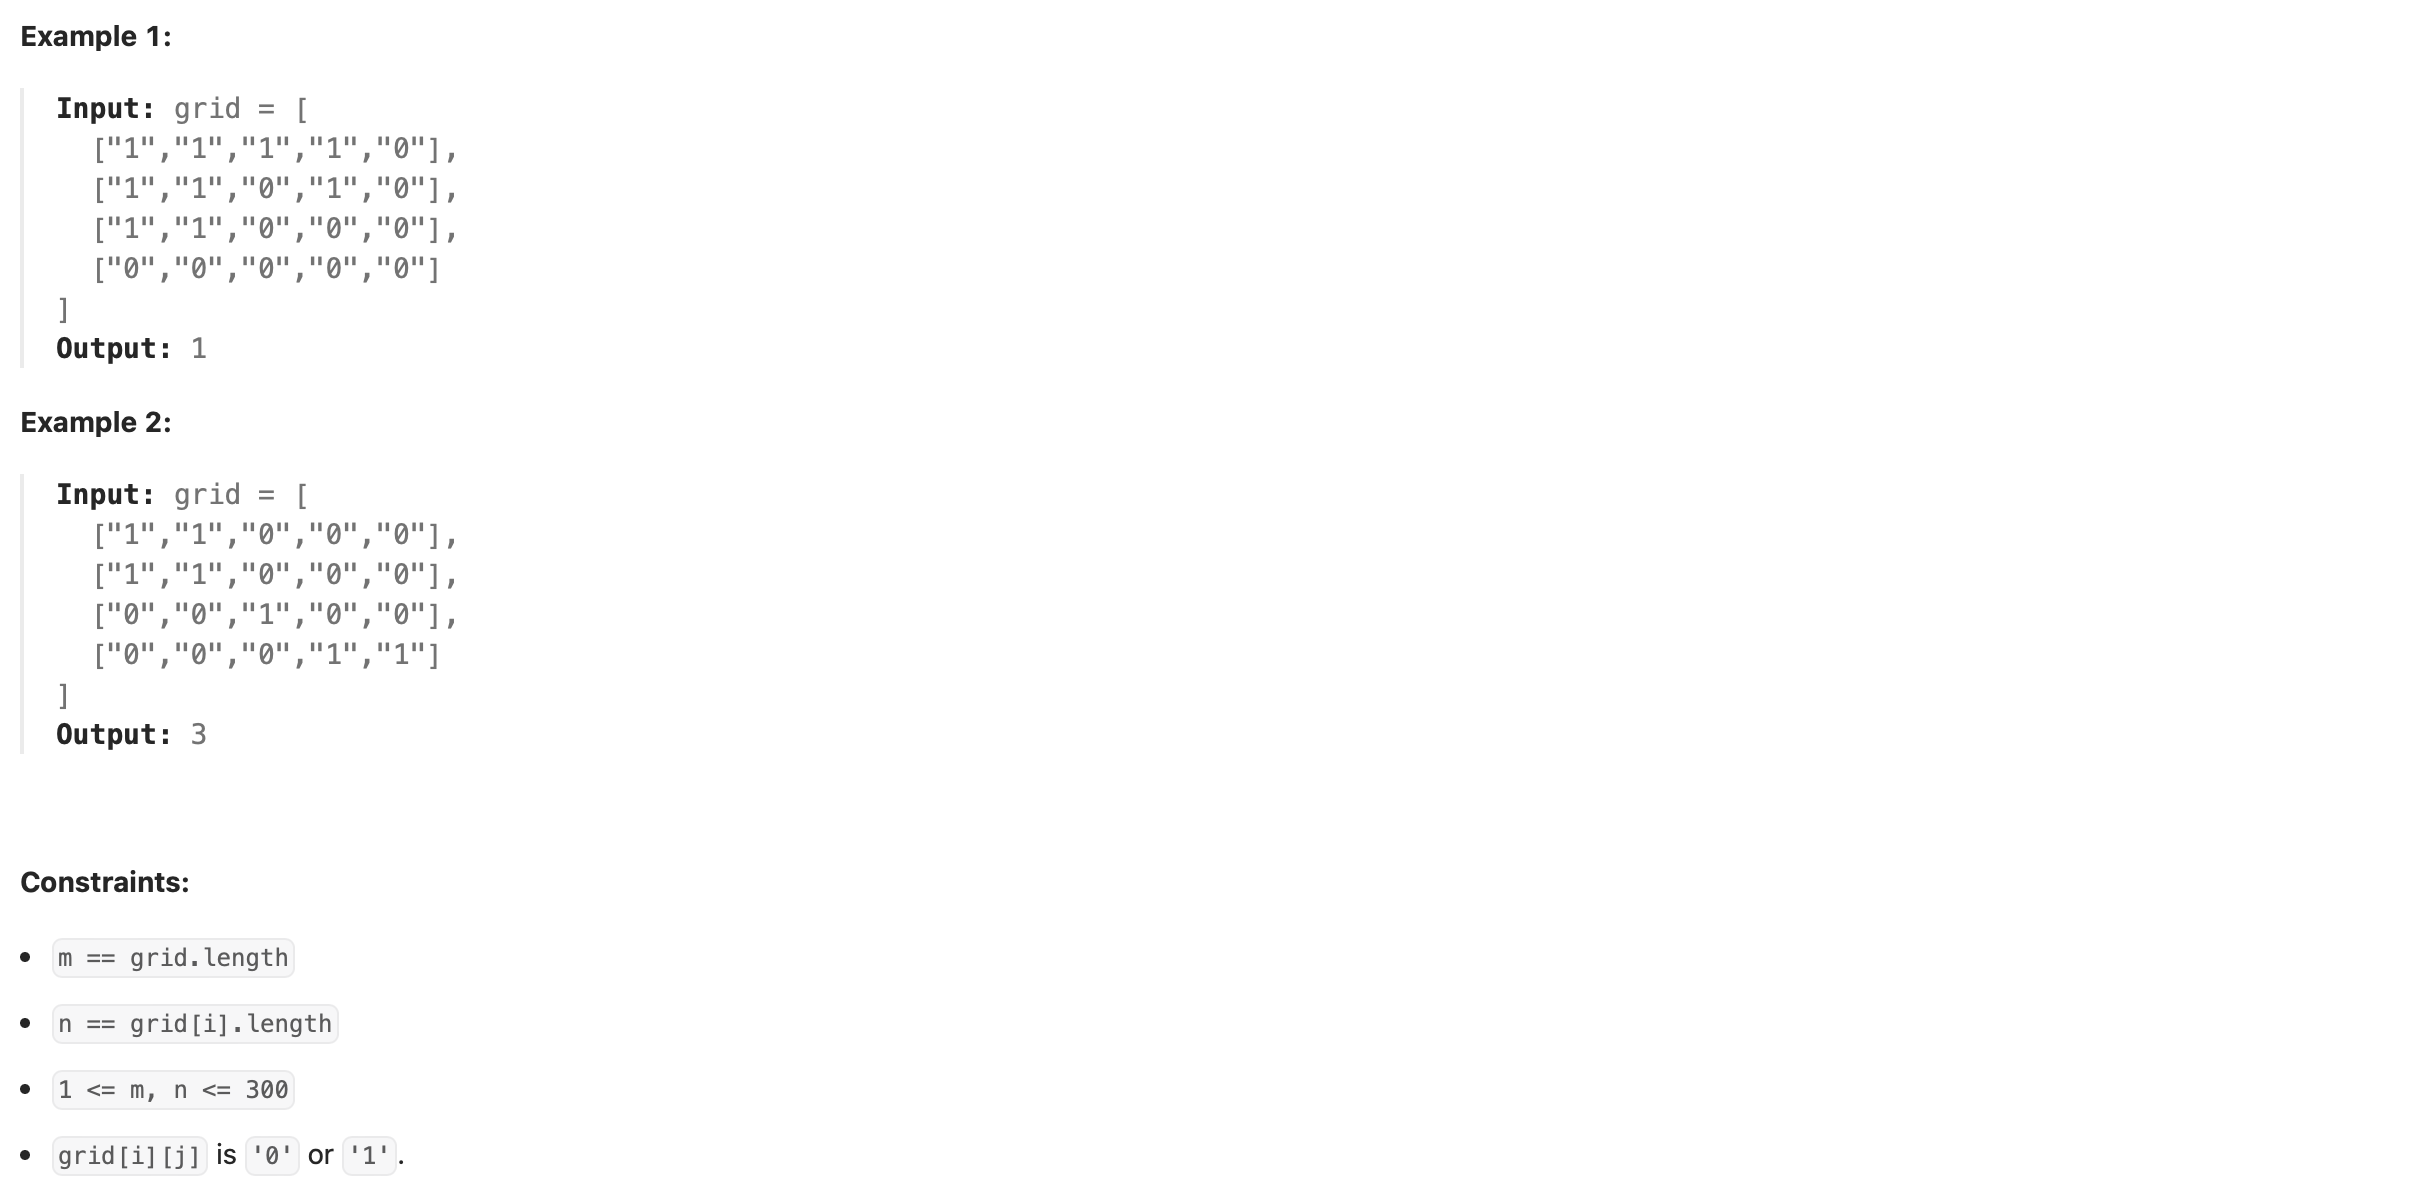

## Approach Overview:

We scan the grid cell by cell. When we find a land cell ('1') that hasn't been visited yet, we know we've found a new island. Using depth first search, we then explore this cell's neighbors *(up, right, down, left)* to find and mark all connected land cells that are part of this same island. Each time we start this process at an unvisited land cell, we've found a new island, so we increment our count.

## Detailed Explanation:

This was an interesting one. The key insight is that we're actually **counting the number of connected components** in a graph, where each land cell (`'1'`) is a node and adjacent land cells form edges. Each connected component represents an island. 

In this example the number of **connected components** or number of **islands** is **3**.

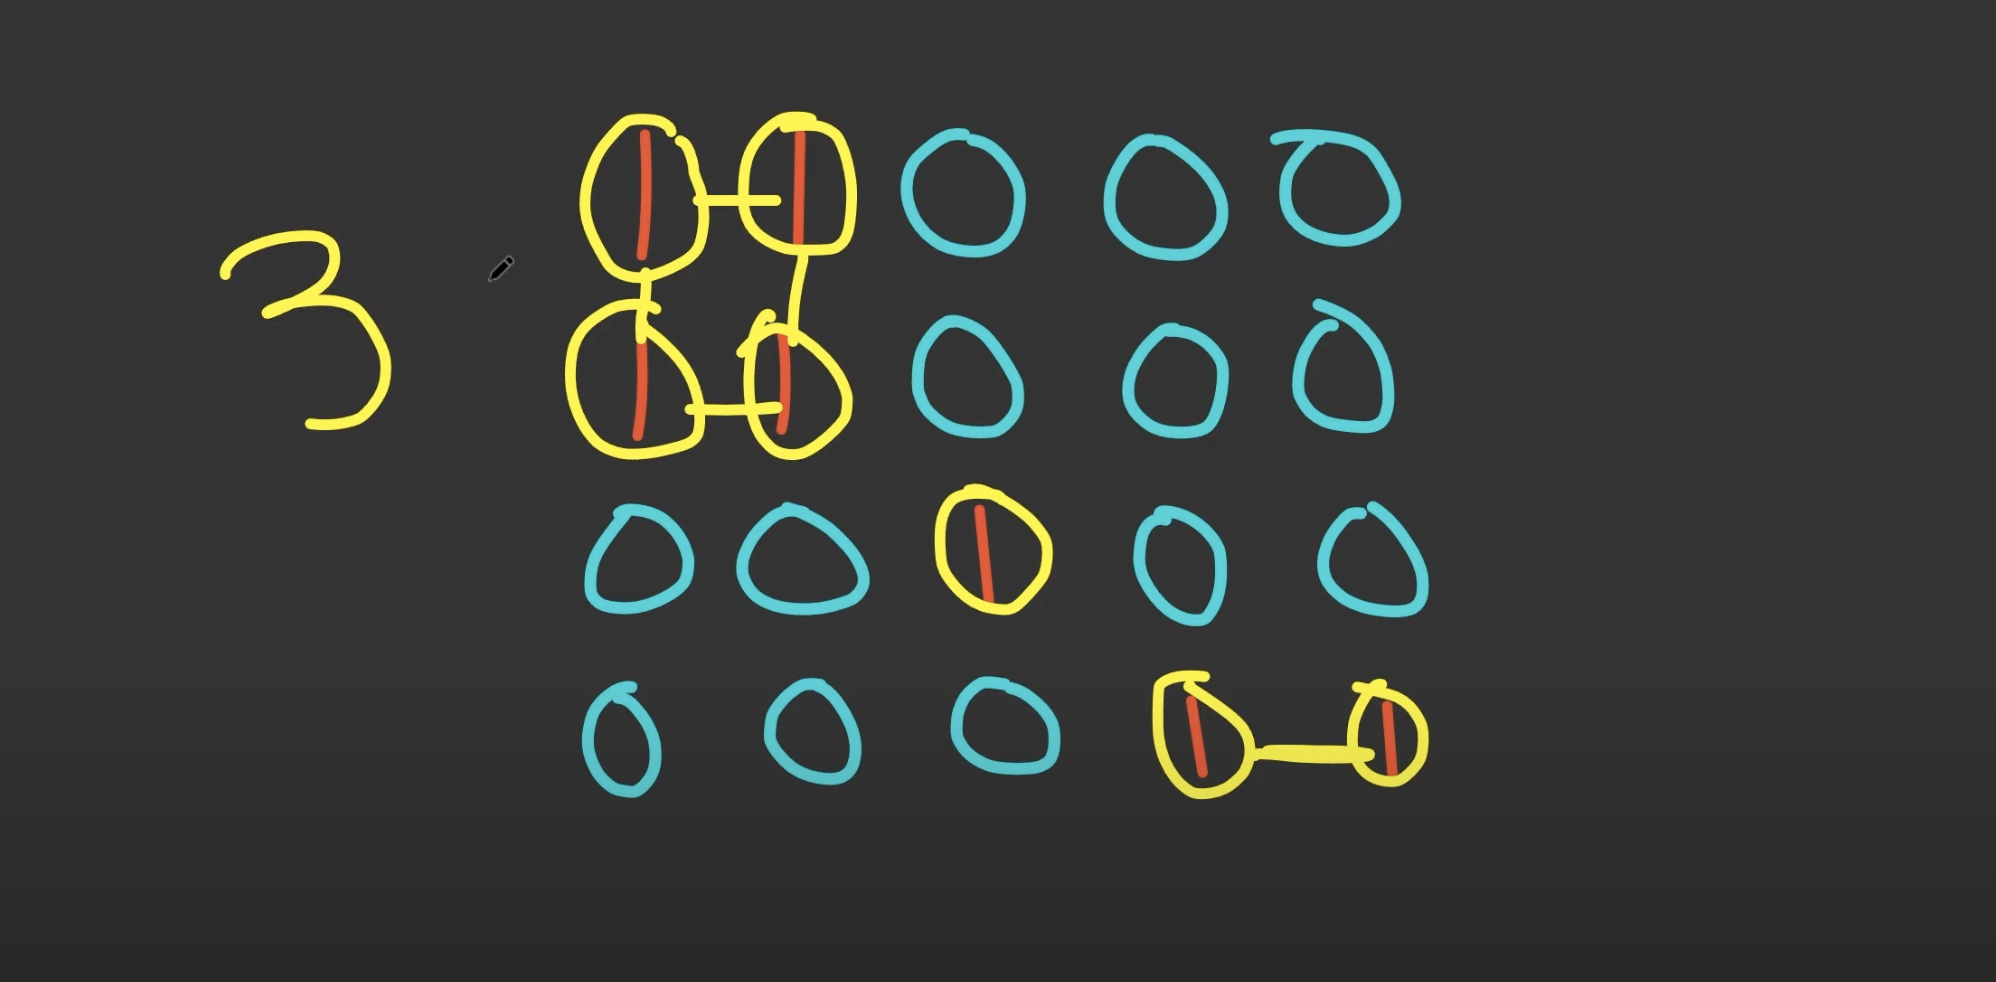

This is why depth first search is a perfect fit - it explores and marks all cells in a connected component (island) before moving on to find the next one.

So the algorithm is going to systematically (row by row) scan through every cell in the grid

For each cell, we first check if:

1. **The cell hasn't been visited before**

2. **The cell is land ('1')**

This check ensures we only start exploring from **unvisited land cells**.

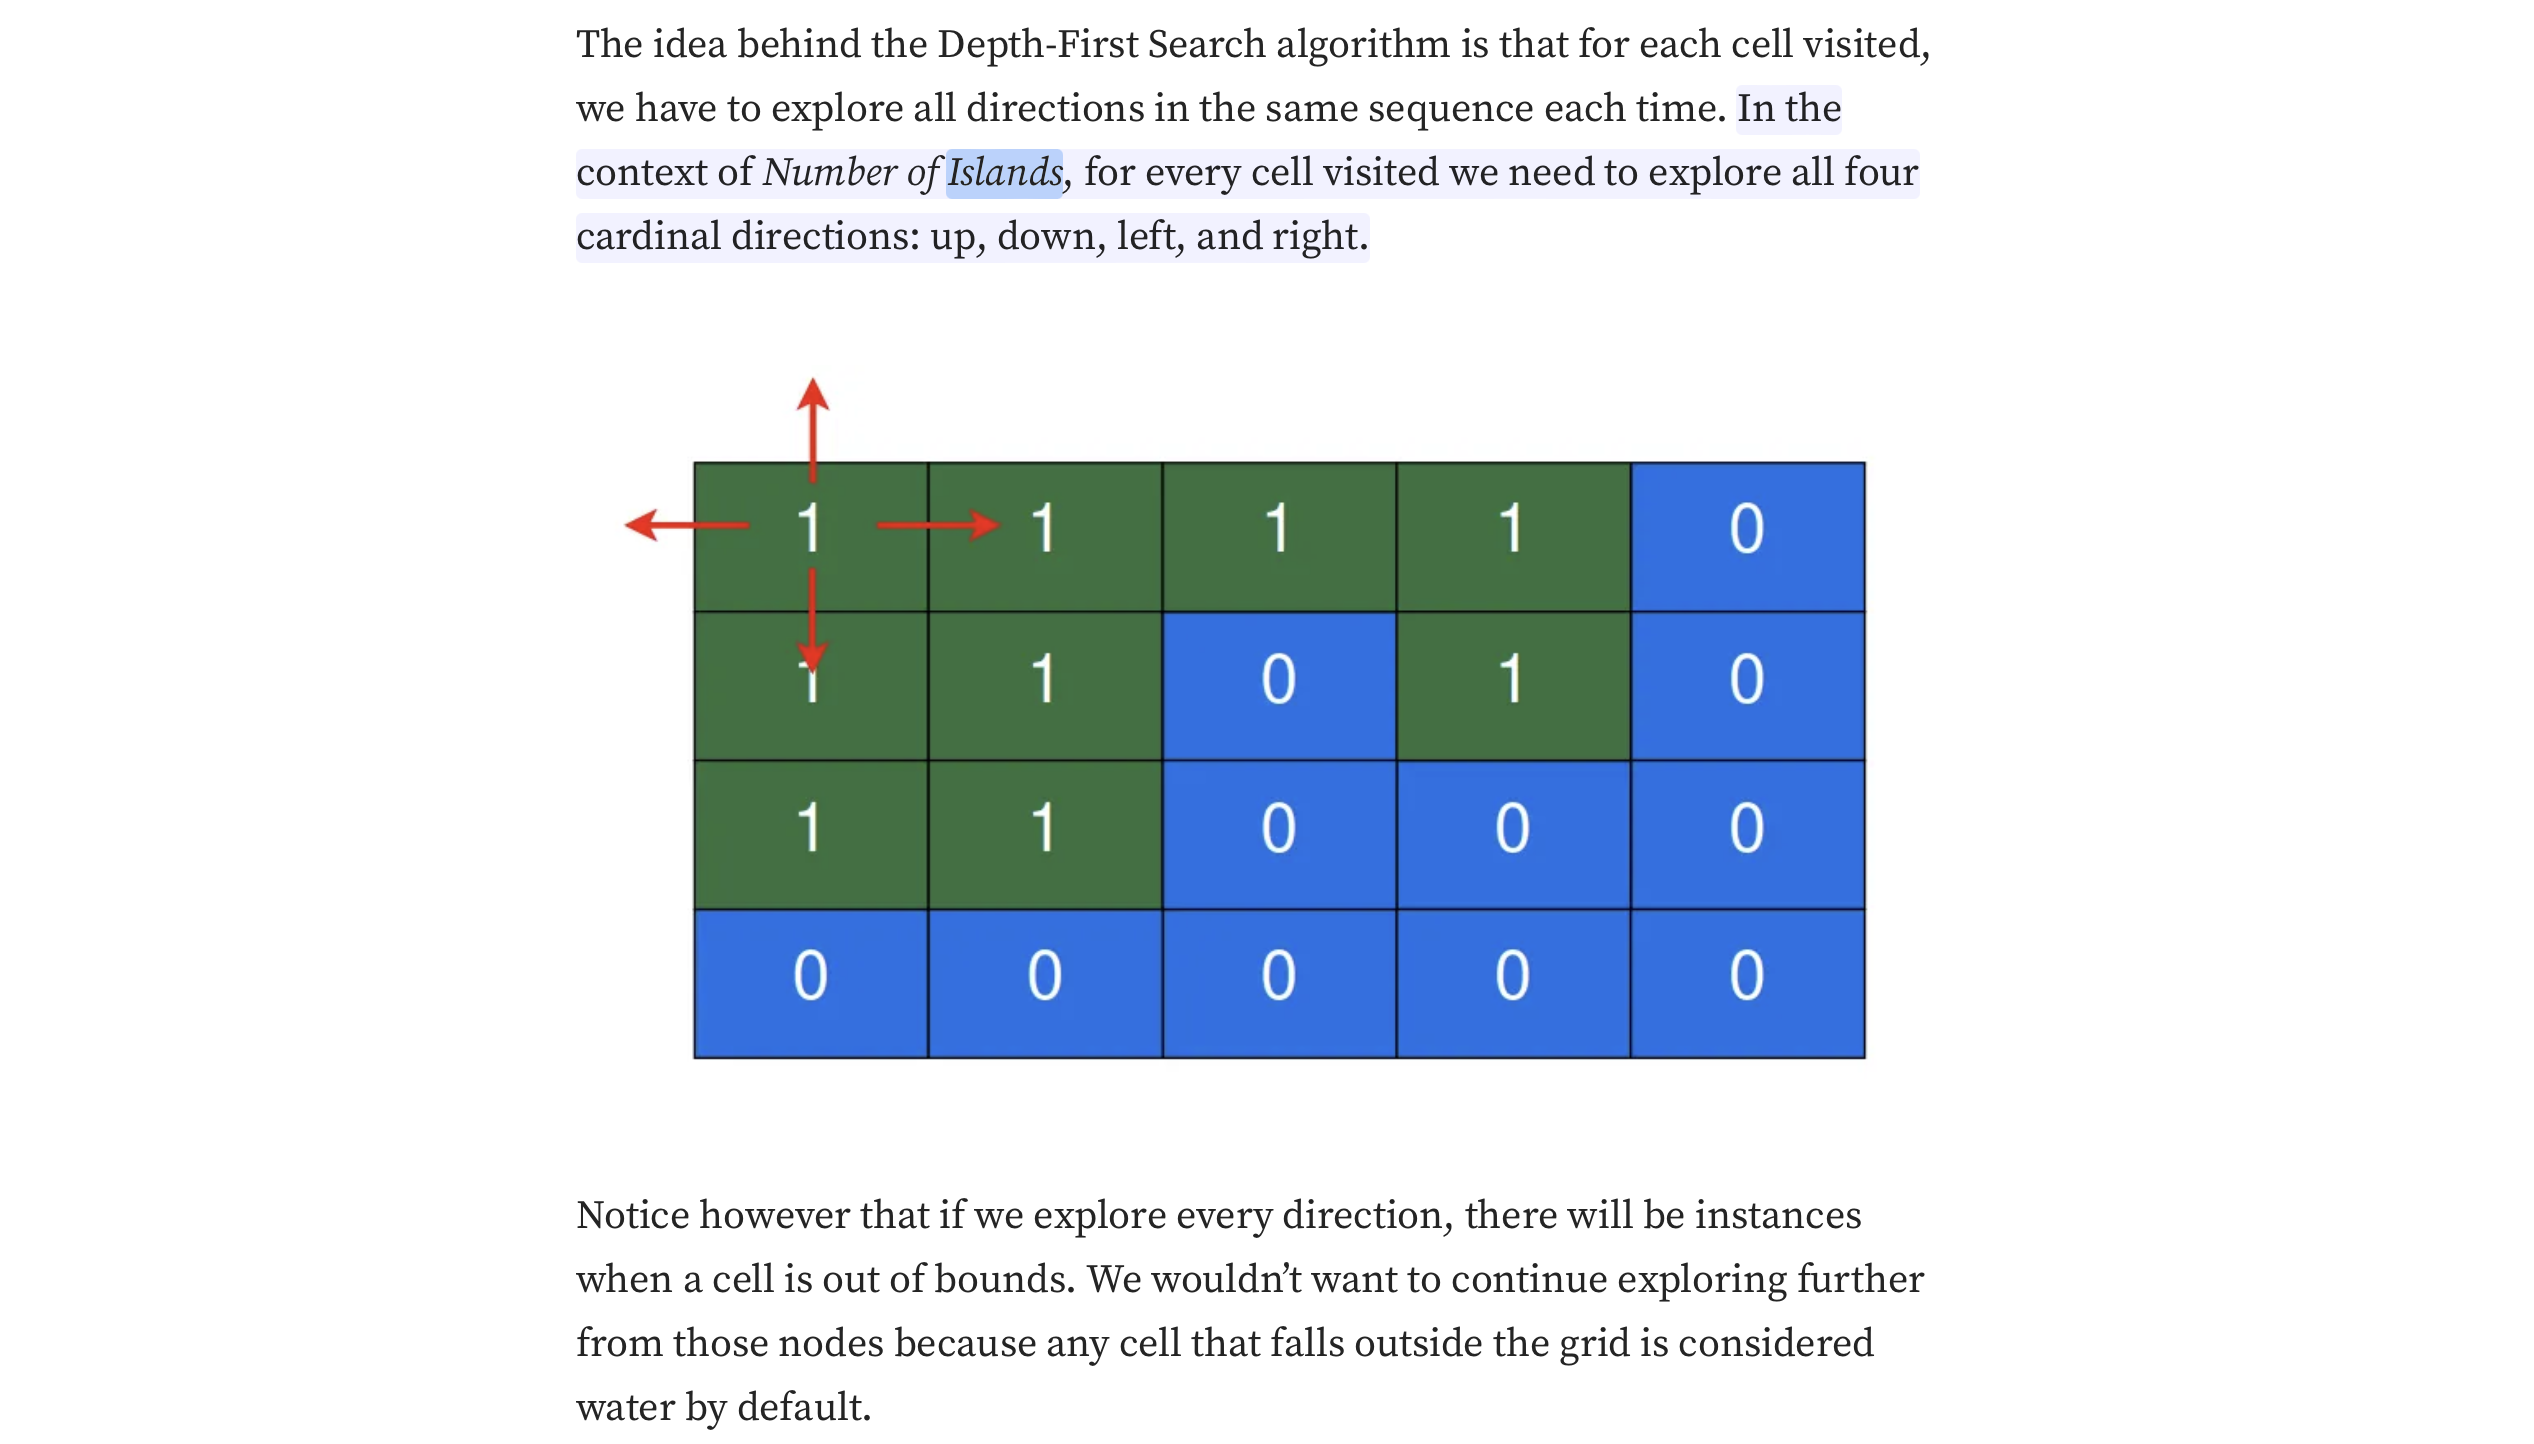

Key insights:


**Why the DFS works: It ensures we explore all connected land cells before moving to a new unvisited cell**

**Importance of visited set: Prevents double-counting and ensures each land cell is part of exactly one island**

## Solution (Iterative DFS using Stack):

In [ ]:
class Solution:
        
    def numIslands(self, grid: List[List[str]]) -> int:


        def findBiggestIsland(x, y):

            # initialize stack to store unvisited cells in grid
            stack = [(x, y)]

            # initialize array to store the directions we're going to explore 
            directions = [(-1, 0), (0, 1), (1, 0), (0, -1)] # up, right, down, left 
            
            # add the cell to the visited set
            visited.add((x, y))
                
            # continue until stack is empty
            while stack:

                # retrieve the last added cell from stack (LIFO)
                # LIFO ensures we always process the deepest cells first
                current_cell = stack.pop() 
                
                # retrieve the co-ordinates of the current cell in the grid 
                x_coords, y_coords = current_cell
  
                # traverse the grid starting from the current cell using DFS
                for dx, dy in directions:
                    
                    # traverse to the next neighboring cell 
                    new_x, new_y = x_coords + dx, y_coords + dy
                    
                    # check if:
                    # 1. new coordinates are within grid bounds
                    # 2. cell hasn't been visited
                    # 3. cell is land ("1")
                    if 0 <= new_x < m and 0 <= new_y < n and (new_x, new_y) not in visited and grid[new_x][new_y] == "1":
                        
                        # add the cell to the visited set
                        visited.add((new_x, new_y))
                
                        # add this cell to the stack
                        stack.append((new_x, new_y))


        # hash set to store all the visited cells
        visited = set()
        
        # variable to keep track of number of islands found in grid
        numberOfIslands = 0
        
        # m = number of rows in grid 
        # n = number of columns in grid
        m, n = len(grid), len(grid[0])

        # loop through the rows of the grid
        for row in range(m):
            # loop through the columns of the grid
            for column in range(n):

                # check if we found a new land ('1')
                if (row, column) not in visited and grid[row][column] == "1":

                    # this is function is going to find the biggest island from this cell
                    findBiggestIsland(row, column)

                    # increment number of islands found
                    numberOfIslands += 1
        
        return numberOfIslands

## Solution (Iterative BFS using Deque)

In [ ]:
class Solution:
        
    def numIslands(self, grid: List[List[str]]) -> int:


        def findBiggestIsland(x, y):

            # initialize stack to store unvisited cells in grid
            deque = [(x, y)]

            # initialize array to store the directions we're going to explore 
            directions = [(-1, 0), (0, 1), (1, 0), (0, -1)] # up, right, down, left 
            
            # add the cell to the visited set
            visited.add((x, y))
                
            # continue until stack is empty
            while deque:

                # Get next cell to explore from the START of the queue
                # Since queue is FIFO (First In, First Out), 
                # this gives us the oldest added cell / the first cell we added to the queue
                current_cell = deque.popleft()
                
                # retrieve the co-ordinates of the current cell in the grid 
                x_coords, y_coords = current_cell
  
                # traverse the grid starting from the current cell using DFS
                for dx, dy in directions:
                    
                    # traverse to the next neighboring cell 
                    new_x, new_y = x_coords + dx, y_coords + dy
                    
                    # check if:
                    # 1. new coordinates are within grid bounds
                    # 2. cell hasn't been visited
                    # 3. cell is land ("1")
                    if 0 <= new_x < m and 0 <= new_y < n and (new_x, new_y) not in visited and grid[new_x][new_y] == "1":
                        
                        # add the cell to the visited set
                        visited.add((new_x, new_y))
                
                        # add this cell to the stack
                        deque.append((new_x, new_y))


        # hash set to store all the visited cells
        visited = set()
        
        # variable to keep track of number of islands found in grid
        numberOfIslands = 0
        
        # m = number of rows in grid 
        # n = number of columns in grid
        m, n = len(grid), len(grid[0])

        # loop through the rows of the grid
        for row in range(m):
            # loop through the columns of the grid
            for column in range(n):

                # check if we found a new land ('1')
                if (row, column) not in visited and grid[row][column] == "1":

                    # this is function is going to find the biggest island from this cell
                    findBiggestIsland(row, column)

                    # increment number of islands found
                    numberOfIslands += 1
        
        return numberOfIslands

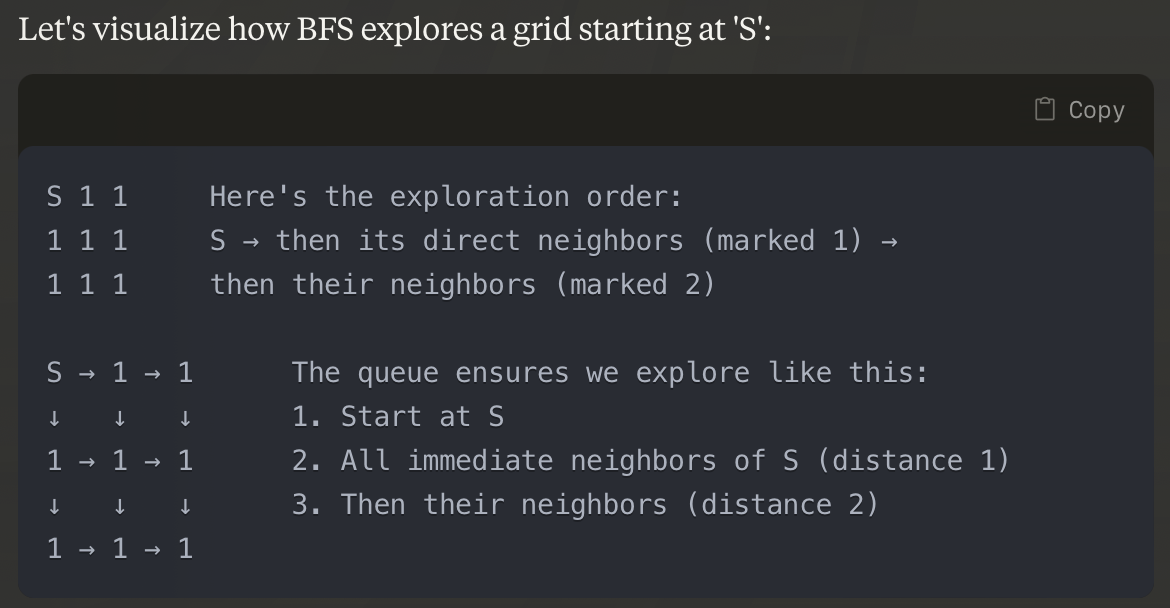